In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [2]:
# fetch model params

icr_symmetric_params = np.load('../eval/training_results/marmotte/icr_symmetrical/ga_hard_snow_a/train_full_all_horizons.npy')
icr_asymmetric_params = np.load('../eval/training_results/marmotte/icr_asymmetrical/ga_hard_snow_a/train_full_all_horizons.npy')
enhanced_kinematic_params = np.load('../eval/training_results/marmotte/enhanced_kinematic/ga_hard_snow_a/train_full_all_horizons.npy')

print(icr_symmetric_params)
print(icr_asymmetric_params)
print(enhanced_kinematic_params)

[0.94304109 0.2867744 ]
[ 1.          0.98309656  0.07612474  0.2935927  -0.30726083]
[ 0.94306235  0.28677371 -0.01469349 -0.00416287]


In [3]:
ideal_diff_drive_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/ga_hard_snow_b/ideal_diff_drive_full_eval_metrics.pkl')
icr_symmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/ga_hard_snow_b/icr_symmetrical_full_eval_metrics.pkl')
icr_asymmetric_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/ga_hard_snow_b/icr_asymmetrical_full_eval_metrics.pkl')
enhanced_kinematic_errors_dataframe = pd.read_pickle('../data/marmotte/eval_results/ga_hard_snow_b/enhanced_kinematic_full_eval_metrics.pkl')

print(enhanced_kinematic_errors_dataframe)

    prediction_error_x prediction_error_y prediction_error_z  \
0              -0.0679           0.035085           0.003413   
1            -0.083651           0.081739          -0.005951   
2             0.146237           0.013546           0.003168   
3             0.147484           0.006135          -0.002081   
4              1.56891          -0.737518          -0.019502   
..                 ...                ...                ...   
203          -0.124252           0.339171           0.000006   
204           0.447385           0.666115           0.042287   
205           0.413811            0.67998            0.02442   
206          -0.036945          -0.421748           -0.01415   
207           0.124867          -0.363515           0.004968   

    prediction_error_roll prediction_error_pitch prediction_error_yaw  \
0                0.026893               0.044467            -0.051462   
1                0.010358               0.046529            -0.041052   
2           

In [4]:
# fetch some stats

ideal_diff_drive_total_trans_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'].sum()
ideal_diff_drive_total_ang_error = ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'].sum()
print('IDD total trans error [m] : ', ideal_diff_drive_total_trans_error)
print('IDD total ang error [rad] : ', ideal_diff_drive_total_ang_error)

icr_symmetric_total_trans_error = icr_symmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_symmetric_total_ang_error = icr_symmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR S total trans error [m] : ', icr_symmetric_total_trans_error)
print('ICR S total ang error [rad] : ', icr_symmetric_total_ang_error)

icr_asymmetric_total_trans_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'].sum()
icr_asymmetric_total_ang_error = icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'].sum()
print('ICR AS total trans error [m] : ', icr_asymmetric_total_trans_error)
print('ICR AS total ang error [rad] : ', icr_asymmetric_total_ang_error)

enhanced_kinematic_total_trans_error = enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'].sum()
enhanced_kinematic_total_ang_error = enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'].sum()
print('EK total trans error [m] : ', enhanced_kinematic_total_trans_error)
print('EK AS total ang error [rad] : ', enhanced_kinematic_total_ang_error)

IDD total trans error [m] :  26.044990067176176
IDD total ang error [rad] :  37.293592370317725
ICR S total trans error [m] :  24.245975119468596
ICR S total ang error [rad] :  36.12826675890081
ICR AS total trans error [m] :  22.77035501632644
ICR AS total ang error [rad] :  36.85396353967834
EK total trans error [m] :  147.86040781442384
EK AS total ang error [rad] :  37.77575032311814


Text(0, 0.5, 'Angular error [rad]')

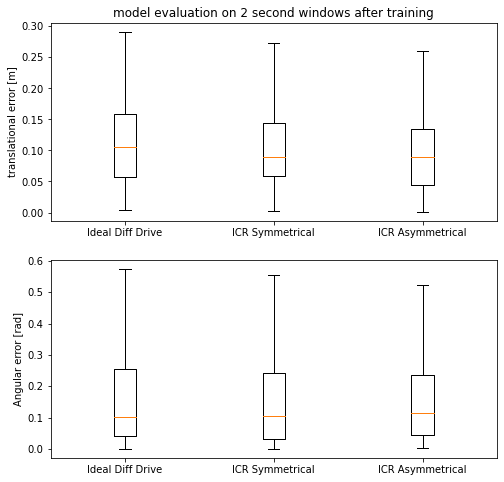

In [6]:
fig1, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[0].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[0].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
# axs[0].boxplot(enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'], showfliers = False, positions =[3], labels=['Enhanced Kinematic'])
axs[0].set_title('model evaluation on 2 second windows after training')
axs[0].set_ylabel('translational error [m]')

axs[1].boxplot(ideal_diff_drive_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[0], labels=['Ideal Diff Drive'])
axs[1].boxplot(icr_symmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[1], labels=['ICR Symmetrical'])
axs[1].boxplot(icr_asymmetric_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[2], labels=['ICR Asymmetrical'])
# axs[1].boxplot(enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'], showfliers = False, positions =[3], labels=['Enhanced Kinematic'])
axs[1].set_ylabel('Angular error [rad]')

(array([75., 86., 83., 87., 62., 60., 46., 23., 27., 95., 34.,  4.,  7.,
        10.,  4.,  9.,  4.,  2.,  2.,  1.,  0.,  3.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.]),
 array([0.00023152071944688226, 0.06091359631140111, 0.12159567190335532,
        0.18227774749530956, 0.24295982308726377, 0.303641898679218,
        0.36432397427117225, 0.42500604986312646, 0.48568812545508067,
        0.5463702010470349, 0.6070522766389891, 0.6677343522309434,
        0.7284164278228976, 0.7890985034148518, 0.849780579006806,
        0.9104626545987602, 0.9711447301907145, 1.0318268057826687,
        1.092508881374623, 1.1531909569665773, 1.2138730325585314,
        1.2745551081504858, 1.33523718374244, 1.395919259334394,
        1.4566013349263485, 1.5172834105183026, 1.5779654861102568,
        1.638647561702211, 1.6993296372941653, 1.7600117128861195,
        1.8206937884780736, 1.88

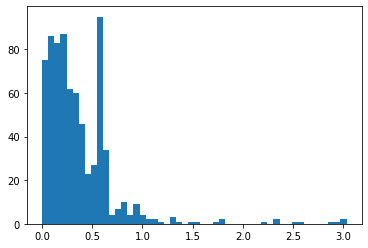

In [18]:
# plot model error histogram

plt.hist(enhanced_kinematic_errors_dataframe['prediction_error_3dof_trans'].to_numpy(), 50)
# plt.hist(enhanced_kinematic_errors_dataframe['prediction_error_3dof_ang'], 50)